<a href="https://colab.research.google.com/github/Nandika28/CatsAndDogs-Task/blob/master/Task2_with_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

import os
import numpy as np
from tensorflow import keras
import glob

# Helper libraries
import IPython.display as display
from PIL import Image
from matplotlib.image import imread
import os.path
from os import path
import matplotlib.cm as cm
import sys
import datetime
import glob as glob
import numpy as np
import cv2
import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD
#from scipy.interpolate import spline
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Step 1: Download the Dataset and get familiar with the organization of data.

In [ ]:
!wget --no-check-certificate \
https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip \
-O "/tmp/cats-and-dogs.zip"

import zipfile
zipped_data_path = "/tmp/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(zipped_data_path,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2020-07-11 08:20:28--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.193.24.126, 2600:140e:6:b8d::e59, 2600:140e:6:ba1::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.193.24.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   319MB/s    in 2.5s    

2020-07-11 08:20:31 (319 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



Step 2: Plan how you will prepare the data to feed to your data processor. (E.g. Maybe you want
to create a new csv or excel file with all the necessary information or feed the current structure
itself to the data processor).

In [ ]:
data_dir = '/tmp/PetImages/'
CLASS_NAMES = os.listdir(data_dir)
print(CLASS_NAMES)

['Cat', 'Dog']


In [ ]:
from sklearn.model_selection import train_test_split
cat_files=os.listdir("/tmp/PetImages/Cat/")

dog_files=os.listdir("/tmp/PetImages/Dog/")

In [ ]:
cat_train, cat_test = train_test_split(cat_files, test_size = 0.2, random_state = 5)
dog_train, dog_test = train_test_split(dog_files, test_size = 0.2, random_state = 5)

In [ ]:
train_file_names = cat_train + dog_train 

test_file_names = cat_test + dog_test 

In [ ]:
np.random.shuffle(train_file_names)

In [ ]:
print("Number of train_files:" ,len(train_file_names))

print("Number of test_files:" ,len(test_file_names))

Number of train_files: 20000
Number of test_files: 5002


In [ ]:
os.mkdir("./random_dir")

Step 3: Create data processors for Training and Testing/Validation. There are many ways to
handle data - Keras Sequences, Keras Generators, TF.Data Pipelines. (Rule of Thumb: Never
show testing/validation data to your model while training).
1. In Task 1 Step 3, use image augmentation with your data processors.-----Here datagenerator is used

In [ ]:
os.mkdir("./random_dir/train")
os.mkdir("./random_dir/test")

In [ ]:
for class_name in CLASS_NAMES:
  os.mkdir(os.path.join("./random_dir/train", class_name))
  os.mkdir(os.path.join("./random_dir/test", class_name))

In [ ]:
import shutil
from os import listdir
from PIL import Image
for file in cat_train:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Cat"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dir/train/Cat/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:   
        print('Bad file:', file) # print out the names

Bad file: 666.jpg


In [ ]:
import shutil
from os import listdir
from PIL import Image
for file in cat_test:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Cat"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dir/test/Cat/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:
        print('Bad file:', file) # print out the names

In [ ]:
import warnings
for file in dog_train:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Dog"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dir/train/Dog/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:
        print('Bad file:', file) # print out the name
        warnings.filterwarnings('always')

Bad file: 11702.jpg


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [ ]:
for file in dog_test:
  if(file!='Thumbs.db' ):
    path_file=os.path.join(os.path.join(data_dir,"Dog"),file)
    if(path.exists(path_file) ):
      try:
        img = Image.open(path_file) # open the image file
        img.verify() # verify that it is, in fact an image
        dest=("./random_dir/test/Dog/"+file)
        shutil.copyfile(path_file, dest)
      except (IOError, SyntaxError) as e:
        print('Bad file:', file) # print out the names

Step 4: Create your own Neural network with Convolution layers, Max Pool Layers, Dense Layers,
Dropout layers from scratch 
2. In Task 1 Step 4, use known networks (such as VGG16, Resnet, etc.) to train your AI
model.----Here keras.applications.xception.Xception has been used for predictions and generation of heat maps 

In [ ]:
os.mkdir("./preview")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/random_dir/train/Cat/10.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [ ]:
# data pre-processing for training
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
# data pre-processing for validation
validate_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [ ]:
# default settings
img_width, img_height = 299, 299
# generate and store training data
train_dir="/content/random_dir/train"
test_dir="/content/random_dir/test"
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = 1)
# generate and store validation data
validate_generator = validate_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = 1)

Found 19996 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


In [ ]:
# this will copy the pretrained weights to our kernel
!mkdir ~/.keras
!mkdir ~/.keras/models
!cp ../input/keras-pretrained-models/*notop* ~/.keras/models/
!cp ../input/keras-pretrained-models/imagenet_class_index.json ~/.keras/models/

mkdir: cannot create directory ‘/root/.keras’: File exists
mkdir: cannot create directory ‘/root/.keras/models’: File exists
cp: cannot stat '../input/keras-pretrained-models/*notop*': No such file or directory
cp: cannot stat '../input/keras-pretrained-models/imagenet_class_index.json': No such file or directory


In [ ]:
# set up transfer learning on pre-trained ImageNet VGG16 model - remove fully connected layer and replace
# with softmax for classifying 10 classes
nb_classes=2
vgg16_model = VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nb_classes, activation = 'softmax')(x)
model = Model(input = vgg16_model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [ ]:
# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

In [ ]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
transfer_learning_history = model.fit_generator(
    train_generator,
    nb_epoch = 2,
    samples_per_epoch = 19996,
    validation_data = validate_generator,
    nb_val_samples = 5002,
    class_weight='auto')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., class_weight="auto", steps_per_epoch=19996, epochs=2, validation_steps=5002)`
  import sys


Epoch 1/2
15990/19996 [======================>.......] - ETA: 1:37 - loss: 0.3710 - accuracy: 0.8522

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

19996/19996 [==============================] - 598s 30ms/step - loss: 0.3650 - accuracy: 0.8573 - val_loss: 0.0031 - val_accuracy: 0.9074
Epoch 2/2
15306/19996 [=====================>........] - ETA: 1:49 - loss: 0.3182 - accuracy: 0.8846

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

19996/19996 [==============================] - 580s 29ms/step - loss: 0.3185 - accuracy: 0.8845 - val_loss: 0.0510 - val_accuracy: 0.9164


In [ ]:
# evaluate the performance the new model and report the results
score = model.evaluate_generator(validate_generator, 5002/1)
print("Test Accuracy:", score[1])

Test Accuracy: 0.9212315082550049


  **Accuracy measured is 92.12% which is a lot better than old cnn model**

In [ ]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_50 (InputLayer)        (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0  

In [ ]:
# save transfer learning model for offline prediction purposes
model.save('dogsandcat_vgg16_model_tl.h5')

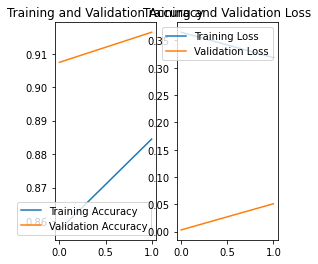

In [ ]:
#visualising training results
acc_train = transfer_learning_history.history['accuracy']
acc_test = transfer_learning_history.history['val_accuracy']

loss_train=transfer_learning_history.history['loss']
loss_test=transfer_learning_history.history['val_loss']

epochs_range = range(2)

plt.figure(figsize=(4,4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_train, label='Training Accuracy')
plt.plot(epochs_range, acc_test, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_train, label='Training Loss')
plt.plot(epochs_range, loss_test, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print(cat_test[0:3])

['10291.jpg', '8982.jpg', '4178.jpg']


In [ ]:
print(dog_test[2:5])

['4178.jpg', '4147.jpg', '7340.jpg']


In [ ]:
# summarize feature map size for each conv layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)


In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np

image_size = 224

# Load pre-trained Keras model and the image to classify
model = tf.keras.applications.vgg16.VGG16()
image = np.random.random((image_size, image_size, 3))
img_tensor = preprocessing.image.img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

conv_layer = model.get_layer("block5_conv3")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

# Get gradient of the winner class w.r.t. the output of the (last) conv. layer
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)


(1, 14, 14)
